## Programming Session Week 3

This file provides additional exercises on linear classification and regression. We start by reviewing concepts in probability and statistics. Then we study the logistic regression classifier.   


### Exercise I. Probability and statistics. 

### Exercise I.1. Bernoulli and Normal distribution. 

__Exercise I.1.a__ Start by plotting the One dimensional Gaussian distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random




__Exercise I.1.b__ Generate values at random from this distribution. Given a set of samples, what is the Maximum Likelihood estimator for $\mu$ ? for $\sigma^2$ ?

__Exercise I.1.c__ Plot the Laplace distribution and generate random values from this distribution. plot the histogram that you obtain from the Laplace distribution. Then plot the corresponding histogram for the Laplace. distribution. 


__Exercise I.1.d__ Generate values $x_i$ at random from this distribution. Given a set of samples $\left\{x_i\right\}_{i=1}^N$ from the Gaussian distribution, what is the Maximum Likelihood estimator for $\mu$ ? for $\sigma^2$ ? 


__Exercise I.1.e__ (*) we say that an estimator is unbiased when $\mathbb{E}\hat{\theta} = \theta$. Would you say that your estimator for the mean is biased or unbiased ? How about the 

__Exercise I.1.f__ Plot the two dimensional Gaussian distribution for varying means and covariance matrices. Use 'plot_surface' first. Then only keep the contours (i.e. use ax.contour). Plot on top of those contours, random $2D$ samples from the distribution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



### Exercise I.2. Logistic Regression, Linear Discriminant Analysis. 

A popular discriminative (resp. generative) model is give by considering as data distribution either the Bernoulli (logistic regression) or Gaussian (Gaussian/Linear Discriminant Analysis) distribution. In this exercise, we will discuss each of those classifiers. For both of them, we will rely on the dataset below

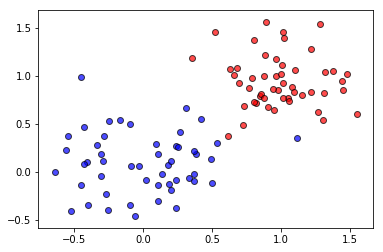

In [30]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100,centers = [[0,0], [1,1]], cluster_std=[0.3, 0.3])

X1 = X[y==1,:]
y1 = y[y==1]
X2 = X[y==0,:]
y2 = y[y==0]

plt.scatter(X1[:,0], X1[:,1], c='r', alpha = 0.7, edgecolors='black')
plt.scatter(X2[:,0], X2[:,1], c='b', alpha = 0.7, edgecolors='black')
plt.show()

### Exercise I.2.1 Logistic regression

In logistic regression, we want to learn a model of the form 

$$y(x) = \sigma(\mathbf{\beta}^T\mathbf{x} + \beta_0)$$

where $\sigma(x)$ is the sigmoid function.

#### I.2.1a.  Start by plotting this function below.

In [ ]:
import matlplotlib.pyplot as plt




#### I.2.1b. In logistic regression, the model above is used to encode the probability of getting the label $1$ or the label $0$. We thus let 

\begin{align}
p(t= 1|\mathbf{x}; \mathbf{\beta}) &= h_{\mathbf{\beta}}(\mathbf{x})\\
p(t= 0|\mathbf{x}; \mathbf{\beta}) &= 1 - h_{\mathbf{\beta}}(\mathbf{x})
\end{align}

Compactly, we can write those lines as 

\begin{align}
p(t= y|\mathbf{x}; \mathbf{\beta}) = (h_{\mathbf{\beta}}(\mathbf{x}))^y (1- h_{\mathbf{\beta}}(\mathbf{x}))^(1-y)
\end{align}
where $y$ can take either of the values $0$ and $1$. One approach to learn this estimator is to look for the maximum likelihood estimator. This function can be viewed as a binomial distribution with associated probability $h_{\mathbf{\beta}}$. In other words, we want to learn a probability model that makes it very likely to observe samples from class $\mathcal{C}_1$and very unlikely to observe samples from class $\mathcal{C}_0$

Write a function, which, given a set of samples $\left\{\mathbf{x}_i, t_i\right\}$ with $t_i=0$ or $1$, learns the logistic regression classifier through Maximum likelihood.  

- Start by deriving the expression for the joint probability of observing the whole dataset $p(\left\{\mathbf{x}_i, t_i\right\})$ assuming each of the samples $\left\{\mathbf{x}_i, t_i\right\}_{i=1}^N$ are independent
- Take the negative log of this probablity and then optimize with gradient descent.


In [ ]:
def logisticRegression_classifier(X, t):
    
    '''Complete the function here. Your function should return  '''
    

### Exercise I.2.2 Gaussian Discriminant Analysis (GDA/LDA)

Logistic regression is known as a discriminative classifier because it learns a model for $p(t|\mathbf{x})$. An alternative would be to learn a model for the (joint) 
distribution $p(\mathbf{x}, t|\mathbf{\beta})$. As soon as we have a model for the class prior, we can then classify new points using Bayes rule

\begin{align}
p(t|\mathbf{X}) \propto p(\mathbf{x}, t)p(t)
\end{align}

A popular generative model is Gaussian Discriminant Analysis (also known as Linear Discriminant Analysis). In this model, when considering two classes, we define the probability of observing the samples as 

\begin{align}
p(\mathbf{x}|t = 0) &= \frac{1}{(2\pi)^{d/2}|\mathbf{\Sigma}|^{1/2}}\exp(-\frac{1}{2}\left(\mathbf{x} - \mathbf{\mu}_0\right)^T\mathbf{\Sigma}^{-1}\left(\mathbf{x} - \mathbf{\mu}_0\right))\\
p(\mathbf{x}|t = 1) &= \frac{1}{(2\pi)^{d/2}|\mathbf{\Sigma}|^{1/2}}\exp(-\frac{1}{2}\left(\mathbf{x} - \mathbf{\mu}_1\right)^T\mathbf{\Sigma}^{-1}\left(\mathbf{x} - \mathbf{\mu}_1\right))
\end{align}

The covariance is thus the same but the Gaussians are centered at different points in space. A typical approach for the class prior is to take 

\begin{align}
p(t=y) = \phi^y (1-\phi)^{1-y}
\end{align}

for some appropriate $\phi$. Compute the parameters of the model (including the means $\mu_1$, $\mu_0$ and probability $\phi$ using a maximum likelihood approach). 



In [ ]:





def LinearDiscriminantAnalysis(X, t):
    
    
    '''The function takes as argument a set of sample points and their associated 
    binary targets and should return the Maximum likelihood parameters for the 
    LDA classifier '''
    
    return mu0, mu1, Sigma, phi




#### Exercise I.2.2.a VIsualizing the discriminant 

Use a function similar to plot_2DClassification_data used in the OLS classification code below to visualize your discriminant. Also plot the resulting Multivariate gaussian using pyplot.contour()

### Exercise II. Using least squares for classification 

__Exercise II.1.Binary OLS classifier__ In this second exercise, we will use least squares to learn a binary classifier.

 - Start by learning the binary classifier through the normal equations
 
 - Then repeat your experiments with the function Ridge classifier. 
 
 - Still with the ridge classifier, add non linear features. and plot the resulting boundary.
 
 
 Once you have learned the classifier, complete the code below to display the discriminant function and the regions corresponding to each class.
 

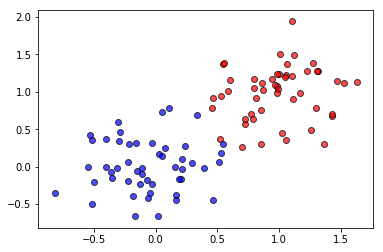

In [27]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100,centers = [[0,0], [1,1]], cluster_std=[0.3, 0.3])

X1 = X[y==1,:]
y1 = y[y==1]
X2 = X[y==0,:]
y2 = y[y==0]

plt.scatter(X1[:,0], X1[:,1], c='r', alpha = 0.7, edgecolors='black')
plt.scatter(X2[:,0], X2[:,1], c='b', alpha = 0.7, edgecolors='black')
plt.show()


In [ ]:

import numpy as np




# modify the function below to plot the linear discriminant function corresponding 
# to the OLS classifier

def plot_2DClassification_data(X, y, beta_plane):  
    
    '''The function assume 2D data. We further assume that the first and second 
    coordinates are encoded as X[:,0] and X[:,1] respectively '''
    
    xmin = np.amin(X[:,0])
    xmax = np.amax(X[:,0])
    ymin = np.amin(X[:,1])
    ymax = np.amax(X[:,1])
    
    xlinspace = np.linspace(xmin, xmax, 100)
    ylinspace = np.linspace(ymin, ymax, 100)
    
    xmesh, ymesh = np.meshgrid(xlinspace, ylinspace, sparse=False, indexing='xy')
    
    xmesh_vec = xmesh.flatten()
    ymesh_vec = xmesh.flatten()
    
    # Replace with your classifier
    
    num_points  = X.shape[0]
    
    
    Xprediction = np.hstack((xmesh_vec.reshape(-1,1),ymesh_vec.reshape(-1,1)))
    Xmat = np.hstack(Xprediction, np.ones((num_points, 1))
                     
                     
   
    # 

    prediction = np.dot(Xmat, beta_plane.reshape(-1,1))
                     
    prediction = prediction > 0
                     
    plt.pcolormesh(xmesh, ymesh, np.reshape(prediction, (len(xlinspace), len(xlinspace))), cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xmesh, ymesh, np.reshape(prediction, (len(xlinspace), len(xlinspace))), [0.5], linewidths=2., colors='white')
                     
    plt.show()


__Exercise II.2__. We now want to extend the binary classifier to a multiclass problem. Consider the dataset shown below. Now extend your result from __Exercise II.1__ to this multiclass problem. 

- First learn a multiclass model by combining several binary classifiers according to the one-vs-rest and one-vs-one approaches.
- Then learn the classifier from the normal equations. 
- Finally use the 'Ridge classifier' from scikit learn. 

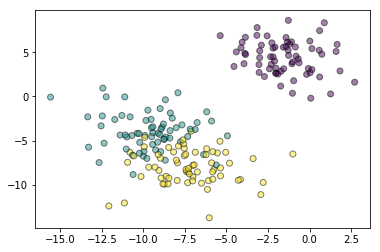

In [20]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200,cluster_std=[2, 2, 2], random_state = 1)

plt.scatter(X[:,0], X[:,1], c=y, alpha = 0.5, edgecolors='black')
plt.show()



In [ ]:
def multiclass(X, t):
    
    '''Put the definition of your multiclass classifier here. '''
    
    
    
    
    return beta





__Exercise II.3 Class imbalance and Synthetic Minority Oversampling Technique (SMOTe)__.

In this exercise we will study one approach at resolving the class imbalance problem. Start by installing the imbalance library. Open a terminal and enter the line 'pip install imbalanced-learn'. 

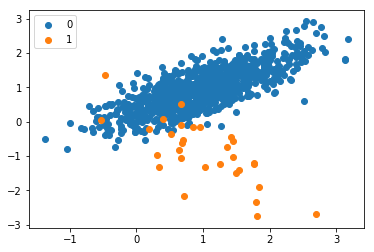

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.97], flip_y=0, random_state=1)

import collections
counter = collections.Counter(y)
import numpy as np

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

plt.legend()
plt.show()


In Order to learn a valid classifier between the orange and the blue class we would like to generate additional points from the orange class. One possible approach at upsampling particular classes is the SMOT algorithm. SMOTe applies the following three steps to the underrepresented class 

- __Step 1__ Using $A$ to denote the minority class, for each sample $x$ in $A$, get the $k$-nearest neighbors of $x$ by calculating the Euclidean distance between $x$ and every other sample in $A$

- __Step 2__ The sampling rate $N$ is set according to the imbalance proportion. For each $x\in A$, $N$ samples are randomly selected frmo the nearest neighbors. Let $A_i$ denote each of those sets.  

- __ Step 3__ For each sample $x_k\in A_i$, generate a new point using the following formula
$$x' = x + \text{rand}(0,1)(x-x_k)$$

$\text{rand}(0,1)$ denotes a random number between $0$ and $1$. 

From the steps above 

__Apply the SMOTe approach to the dataset shown above for different amounts of SMOTe__ (i.e values of the parameter $N$). Note that, since we generate T*N additional points, a good choice could be to try $N\approx \frac{\text{Majority Class}}{\text{Minority Class}}$ 

In [ ]:
# put your answer here 






### Exercise III. Good Wine and healthy heart

#### Exercise III.1 The risk of cardiovascular disease

In this exercise, we will use logistic regression to detect the patients who are more likely to develop a heart disease. Open an account on [Kaggle](https://www.kaggle.com/) and download the [Framingham Heart study dataset](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset). 

<img src="heartDisease.jpg" style="width: 400px;"/>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


heart_data = pd.read_csv("framingham.csv")


data_pruned = '''add your code here'''





#### Exercise III.2 Classifying wines with logistic regression. 

Go to the UCI ML Repository and download the [Wine classification dataset](http://archive.ics.uci.edu/ml/datasets/Wine+Quality). This dataset contains wine samples on which some measurements (acidity, alcohol, sulphates) have been acquired. Each of the sample is then given a quality label between 0 and 10. The problem is thus a 10 class classification problem. Follow the steps below to learn a multi-class logistic regression classifier on the wine dataset


- Load the csv file with pandas
- Remove the rows for which some of the data might be missing 
- Once you have pruned the dataset. Split this dataset between a training and a learning part using the 'train_test_split' function from scikit learn
- Use the training part to learn the logistic regression classifier (you don't need to code the classifier, simply load the scikit learn module)
- Once you have learned the classifier, apply it to your test set and compare your predictions against the true wine labels. Compute your score (Number of correct classifications over validation set size.)

<img src="wine-tasting.jpeg" style="width: 400px;"/>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



data = '''load the data from UCI repo'''


X_train, X_test, y_train, y_test = train_test_split('''complete with the wine data''')

logisticClassifier  = LogisticRegression()
logisticClassifier.fit() # complete with your data

logisticClassifier.predict() # complete with your data


